<a href="https://colab.research.google.com/github/chitralekha13/IIITD-MIDAS/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data cleansing of the given appstore_games dataSet
import pandas as pd
from google.colab import files
import os
import numpy as np
import tensorflow.compat.v1 as tf
import seaborn as sns
import matplotlib.pyplot as plt
import re

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

import sys
import warnings
import random

if not sys.warnoptions:
    warnings.simplefilter("ignore")
tf.disable_v2_behavior()

#uploaded = files.upload()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
data = pd.read_csv("dataset.csv")

In [ ]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [ ]:
#dropping all the unnecessary coloumns
data.drop("uniq_id", inplace=True, axis=1)
data.drop("crawl_timestamp", inplace=True, axis=1)
data.drop("product_url", inplace=True, axis=1)
data.drop("retail_price", inplace=True, axis=1)
data.drop("discounted_price", inplace=True, axis=1)
data.drop("image", inplace=True, axis=1)
data.drop("is_FK_Advantage_product", inplace=True, axis=1)
data.drop("product_rating", inplace=True, axis=1)
data.drop("overall_rating", inplace=True, axis=1)
data.drop("product_specifications", inplace=True, axis=1)

In [ ]:
data.head()

,product_name,product_category_tree,pid,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,Specifications of Sicons All Purpose Arnica Do...,Sicons


In [ ]:
data.shape
data.dropna

<bound method DataFrame.dropna of                                   product_name  ...             brand
0          Alisha Solid Women's Cycling Shorts  ...            Alisha
1          FabHomeDecor Fabric Double Sofa Bed  ...      FabHomeDecor
2                                   AW Bellies  ...                AW
3          Alisha Solid Women's Cycling Shorts  ...            Alisha
4        Sicons All Purpose Arnica Dog Shampoo  ...            Sicons
...                                        ...  ...               ...
19995           WallDesign Small Vinyl Sticker  ...        WallDesign
19996  Wallmantra Large Vinyl Stickers Sticker  ...        Wallmantra
19997  Elite Collection Medium Acrylic Sticker  ...  Elite Collection
19998  Elite Collection Medium Acrylic Sticker  ...  Elite Collection
19999  Elite Collection Medium Acrylic Sticker  ...  Elite Collection

[20000 rows x 5 columns]>

In [ ]:
def clean_alt_list(list_):
    
    list_ = list_.replace('>>', ' ')
    list_ = list_.replace('["', ' ')
    
    list_ = list_.replace('"]', ' ')
    
    list_ = list_.replace(',', ' ')
    list_ = list(list_.split(" "))
    list_ = list_[1]

    return list_

In [ ]:
df = data.copy()
df['product_category_tree'] = df['product_category_tree'].apply(clean_alt_list)
#df['product_category_tree'] = df['product_category_tree'].str.replace('[', ' ')
#df['product_category_tree'] = df['product_category_tree'].str.replace('[', ' ')
#df['product_category_tree'] = df['product_category_tree'].str.split()
#df['product_category_treee'] = df['product_category_tree'].strip(' ')
#data1['product_category_treee'] = data1['product_category_treee'].map(lambda x: x[0])
df.tail(100)


,product_name,product_category_tree,pid,description,brand
19900,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Baby,STIE5UVGW2JWVWCT,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Uberlyfe
19901,La Isla Women Heels,Footwear,SNDEY7QPXUF5PZSZ,Flipkart.com: Buy La Isla Women Heels only for...,NaN
19902,Wallmantra Medium Vinyl Sticker Sticker,Baby,STIEC889ZGFD3RCE,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Wallmantra
19903,Fun To See Reusable Sticker,Baby,STIE2KFZTQFVYZQQ,Buy Fun To See Reusable Sticker for Rs.1099 on...,Fun To See
19904,WallDesign Small Vinyl Sticker,Baby,STIE7KFGSBYBQG8U,Buy WallDesign Small Vinyl Sticker for Rs.530 ...,WallDesign
...,...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,Baby,STIE7KFJAKSTDY9G,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign
19996,Wallmantra Large Vinyl Stickers Sticker,Baby,STIE9F5URNQGJCGH,Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra
19997,Elite Collection Medium Acrylic Sticker,Baby,STIE7VAYDKQZEBSD,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19998,Elite Collection Medium Acrylic Sticker,Baby,STIE8YSVEPPCZ42Y,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection


In [ ]:
df.product_category_tree.unique()

array(['Clothing', 'Furniture', 'Footwear', 'Pet', 'Eternal', 'Pens',
       'Sports', 'Beauty', 'Bengal', 'Bags', 'Home', 'Automotive',
       'Tools', 'Vishudh', 'BuildTrack', 'Skayvon', 'MASARA', 'Behringer',
       'Noor', 'Libas', 'Baby', 'Mobiles', 'Food', 'Watches', 'Toys',
       'Jewellery', 'Cellbazaar', 'Dressberry', 'Mast', 'Sisel', 'Knight',
       'Indistar', 'Glacier', 'Asics', 'Escan', 'Nine', 'Sunglasses',
       'Kitchen', 'Computers', 'Cameras', 'ANAND', 'Prime', 'Health',
       'Speedwav', 'Vitamins', 'Gaming', 'Sumo', 'Kombee', 'NEWGEN',
       'Automation', 'K&P', 'Adidas', 'Bootwale', 'clickforsign',
       'Treppe', 'Kanvas', 'Klaur', 'Clickforsign', 'kem', 'Carbanao',
       'Oddy', 'Synergy', 'SHOPOJ', 'SUPERMOD', 'Lilliput', 'Frabjous',
       'Zevrr', 'Rasav', 'Royal', 'ANASAZI', 'INVENTURE', 'Fabpoppy',
       'Power', 'Gking', 'GM', 'Shrih', 'Threads', 'xy', 'Favourite',
       'Disney', 'Little', 'Wearable', 'The', 'fourgee', 'Laser', 'INKT',
       "E'H

In [ ]:
Non_Main_Genres = df[~df.product_category_tree.str.contains('Clothing') & \
                    ~df.product_category_tree.str.contains('Pens') & \
                    ~df.product_category_tree.str.contains('Automotive	') & \
                    ~df.product_category_tree.str.contains('Tools') & \
                    ~df.product_category_tree.str.contains('Beauty') & \
                    ~df.product_category_tree.str.contains('Home') & \
                    ~df.product_category_tree.str.contains('Jewellery') & \
                    ~df.product_category_tree.str.contains('Sports') & \
                    ~df.product_category_tree.str.contains('Baby') & \
                    ~df.product_category_tree.str.contains('Gaming') & \
                    ~df.product_category_tree.str.contains('Bags') & \
                    ~df.product_category_tree.str.contains('Computers') & \
                    ~df.product_category_tree.str.contains('Kitchen') & \
                    ~df.product_category_tree.str.contains('Mobiles') & \
                    ~df.product_category_tree.str.contains('Footwear') & \
                    ~df.product_category_tree.str.contains('Watches') ].index
df.drop(Non_Main_Genres , inplace = True)

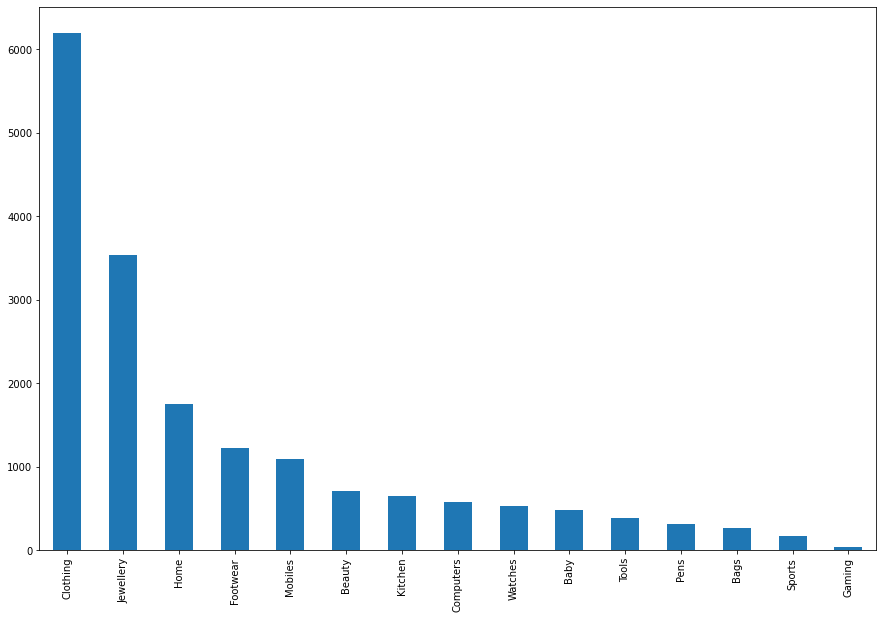

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
df['product_category_tree'].value_counts().plot.bar()
plt.show()

In [ ]:
 import nltk
 nltk.download('punkt')
 nltk.download('averaged_perceptron_tagger')
 nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
all_text = list(df['description'][...])

In [ ]:
def get_wordnet_pos(treebank_tag):
    """
    Return the POS of each word for later usage .
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN 

In [ ]:
def clean_str(string):
    """
    String cleaning .
    """
    string = re.sub(r"[^A-Za-z0-9]", " ",str(string)) # remove unused charactor other than english letter and number, use space to replace
    return string.strip()                         # delete the first and last space

In [ ]:
def text_lemmatization(l,lemmatizer,t_text, word_count):
    """
    Tokenization: Split the text into words. 
    Lemmatize the text .
    """
    for i in range(len(t_text)):
        text_clean = clean_str(t_text[i])     # clean texts, remove useless symbols
        text_word = word_tokenize(text_clean) # set each individual token
        text_pos = pos_tag(text_word)         # pos tagging each token [word,POS]
        text_lemma = ""
        for item in text_pos:                 # lemmatizing each token
            # Put each word after lemmatization into the list
            text_lemma = text_lemma + " " + (lemmatizer.lemmatize(item[0],get_wordnet_pos(item[1])))     
        l.append(text_lemma.strip())          # append the preprocessed sample to x_train list, remove the space
        word_count.append(len(text_pos))
    return l, word_count   


In [ ]:
# preprocessing
text = list()
word_count = list()                   #statistics how many words in each sample
lemmatizer = WordNetLemmatizer()      # model used to lemmatize word (defined by package nltk)
text_lemmatized, word_count = text_lemmatization(text,lemmatizer,all_text, word_count)

In [ ]:
class Indexer:
    # Tokenizer
    def __init__(self):
        self.counter = 1
        self.d = {"<unk>": 0}
        self.rev = {}
        self._lock = False
        self.word_count = {}
        self.rev_d = {}
        self.rev[0] = "unk"
    def convert(self, w):
        if w not in self.d:
            if self._lock:
                return self.d["<unk>"]
            self.d[w] = self.counter
            self.rev[self.counter] = w
            self.counter += 1
            self.word_count[self.d[w]] = 0
        self.word_count[self.d[w]] = self.word_count[self.d[w]] + 1
        return self.d[w]
    def convertback(self, w):
        return self.rev[w]
    def lock(self):
        self._lock = True

In [ ]:
all_data = []
split_data = []
tokenizer = Indexer()
max_len_sent = 0
num_of_padding = 0
vocabulary = 0
max_index = 0
for i, t in enumerate(text_lemmatized):
    current_convert = [tokenizer.convert(w) for w in t.split()]
    m = max(current_convert)
    max_index = max(max_index,max(current_convert))
    max_len_sent = max(max_len_sent, len(current_convert))
    split_data.append(current_convert)
vocabulary_size = max_index + 1    
    
    
for i, t in enumerate(split_data):  
    if (len(t) < max_len_sent):
        num_of_padding = max_len_sent - len(t)
        for n in range(0,num_of_padding):
            t.append(0)        
    all_data.append(t)


text_df = pd.DataFrame(all_data)
cate_df = pd.DataFrame(df['product_category_tree'])
df_text_cate =  text_df 
df_text_cate['category'] = 'cat'
for i in range(0,len(cate_df)):
    df_text_cate.at[i,'category'] = cate_df.iloc[i]['product_category_tree']

labels =  list(df_text_cate.category.unique())
for l in labels:
    df_text_cate[l] = 0
for i in range(0,len(df_text_cate)):
    cat = df_text_cate.iloc[i]['category']
    df_text_cate.at[i,cat] = 1  

In [ ]:
cat_sample_max = max(df['product_category_tree'].value_counts())
delete_cate = ['Furniture', 'Pet', 'Eternal', 'Bengal', 'Automotive',
        'Vishudh', 'BuildTrack', 'Skayvon', 'MASARA', 'Behringer',
       'Noor', 'Libas',   'Food',  'Toys',
        'Cellbazaar', 'Dressberry', 'Mast', 'Sisel', 'Knight',
       'Indistar', 'Glacier', 'Asics', 'Escan', 'Nine', 'Sunglasses',
       'Cameras', 'ANAND', 'Prime', 'Health',
       'Speedwav', 'Vitamins', 'Sumo', 'Kombee', 'NEWGEN',
       'Automation', 'K&P', 'Adidas', 'Bootwale', 'clickforsign',
       'Treppe', 'Kanvas', 'Klaur', 'Clickforsign', 'kem', 'Carbanao',
       'Oddy', 'Synergy', 'SHOPOJ', 'SUPERMOD', 'Lilliput', 'Frabjous',
       'Zevrr', 'Rasav', 'Royal', 'ANASAZI', 'INVENTURE', 'Fabpoppy',
       'Power', 'Gking', 'GM', 'Shrih', 'Threads', 'xy', 'Favourite',
       'Disney', 'Little', 'Wearable', 'The', 'fourgee', 'Laser', 'INKT',
       "E'Hiose", 'Lucky', 'Ocean', 'Wella', 'Pu-Good', 'Olvin', 'TSG',
       'Pout', 'classyworld', 'HANS', 'TIMBERLAKE', 'Urban', 'FEET',
       'Jazz', 'Miss', 'Dilan', 'SMART', 'Clovia', 'PrivateLifes',
       'COIRFIT', 'Spa', 'run', 'SAY', 'Legmark', 'Siyas', 'Dassler',
       'piftif', 'REMSON', 'killys', 'INDILEGO', 'Firangi', 'Starsy',
       'Oly', 'soie', 'Auraa', 'e-Fresh', 'Attitude', 'Kalpaveda',
       'Walkline', 'D&D', 'Ajaero', "Ruhi's", 'Samprada', 'Naaz', 'Camey',
       'Viral', 'Wellon', 'Amita', 'Impala', 'Fly', 'Crafty', 'tadd',
       'Dolz', 'LondonHouze', 'Linzina', 'Foot', '883', 'Style', 'Just',
       'SJ', 'Pia', 'Car', 'Sj', 'FIFO', 'Himmlisch', 'V&G', 'Anuradha',
       'Shonaya', 'JUSF2', 'Sonaxo', 'Koie', 'OEM', 'Kittens',
       'AutoKraftZ', 'GALLOWAY', 'Dremel', 'Eyewear', 'ABEEZ', 'Joyra',
       'BLM', 'ATV', 'Be', 'Taurus', 'Abhinl', 'UFO', 'LGRL',
       'Breakbounce', 'BALAJI', 'Siemens', 'Remax', 'Boreal', 'Srajanaa',
       'Selfcare', 'Sugandh', 'Arial', 'eBooks', 'Zikrak', 'Zixtro',
       'New', 'RajeshFashion', 'United', 'SRPC', 'Kraft', 'Autoplus',
       'Leading', 'Yo', 'THERISE', 'Nut', 'Vinenzia', 'Planet', 'Small',
       'EASIES', 'Household', 'Pazel', 'Corcepts', 'Areon']

for l in  delete_cate:
    df.drop(df.loc[df['product_category_tree']==l].index, inplace=True)

all_text = list(df['description'][...])
all_cate = np.array(df['product_category_tree'].tolist())

In [ ]:
def oversampling_and_split_dataset(df,trainingratio,l):
    
    trainingratio = 0.7
    index_list = {}
    number_of_samples_cat = {}
    training_samples = {}
    train_random_indices = {}
    duplicated_train_indices = {}
    for l in labels:
        index_list[l] = np.array(df[df.category == l].index)
        number_of_samples_cat[l] = len(index_list[l]) 
        training_samples[l] = round(number_of_samples_cat[l]*trainingratio)  
        train_random_indices[l] = np.random.choice(index_list[l], training_samples[l], replace = False)
        if (l == 'Clothing'): 
            duplicated_train_indices[l] = train_random_indices[l]
        else:
            baseline = int(round(cat_sample_max*trainingratio))
            duplicated_train_indices[l] = np.random.choice(train_random_indices[l], baseline , replace = True)
            duplicated_train_indices[l] = np.array(duplicated_train_indices[l])  
    
    train_indices = duplicated_train_indices['Mobiles']
    for l in labels:
        if (l != 'Mobiles'): 
            train_indices  = np.concatenate([train_indices, duplicated_train_indices[l]])
   
    training_data = df.iloc[train_indices,:]      
    testing_data = df.drop(train_indices,axis=0)  

    #shuffle the data
    training_data=training_data.sample(frac=1).reset_index(drop=True)

    split = int(len(testing_data)/2)
    train_y = training_data.iloc[:,27:57]
    train_x = training_data.iloc[:,0:26] 
    
    valid_y = testing_data.iloc[0:split,27:57]
    valid_x = testing_data.iloc[0:split,0:26]  
    
    test_y = testing_data.iloc[split:,27:57]
    test_x = testing_data.iloc[split:,0:26] 
    
    return train_x, train_y, valid_x, valid_y, test_x, test_y
    

train_ratio = 0.7
training_x, training_y, validation_x, validation_y, testing_x, testing_y = oversampling_and_split_dataset(df_text_cate,train_ratio,labels)

In [ ]:
# Model Hyperparameters
embedding_dim = 50
filter_sizes = "3,4,5"
num_filters = 100
dropout_keep_prob = 0.5
l2_reg_lambda = 0.0

# Training parameters
batch_size = 64
num_epochs = 80
num_batches =len(training_x)/64 

In [ ]:
class TextCNN(object):
    """
    A CNN for text classification.
    Uses an embedding layer, followed by a convolutional, max-pooling and softmax layer.
    """
    def __init__(
      self, sequence_length, num_classes, vocab_size,
      embedding_size, filter_sizes, num_filters, l2_reg_lambda=0.0):

        # Placeholders for input, output and dropout
        self.input_x = tf.placeholder(tf.int32, [None, sequence_length], name="input_x")
        self.input_y = tf.placeholder(tf.float32, [None, num_classes], name="input_y")
        self.dropout_keep_prob = tf.placeholder(tf.float32, name="dropout_keep_prob")

        # Keeping track of l2 regularization loss (optional)
        l2_loss = tf.constant(0.0)

        # Embedding layer
        with tf.device('/cpu:0'), tf.name_scope("embedding"):
            self.W = tf.Variable(tf.random_uniform([vocab_size, embedding_size], -1.0, 1.0),name="W")  # We initialize embedding matrix using a random uniform distribution.
            self.embedded_chars = tf.nn.embedding_lookup(self.W, self.input_x)                        
            self.embedded_chars_expanded = tf.expand_dims(self.embedded_chars, -1) 

        # Create a convolution + maxpool layer for each filter size
        pooled_outputs = []
        for i, filter_size in enumerate(filter_sizes): 
            with tf.name_scope("conv-maxpool-%s" % filter_size):
                # Convolution Layer
                filter_shape = [filter_size, embedding_size, 1, num_filters] 
                W = tf.Variable(tf.truncated_normal(filter_shape, stddev=0.1), name="W")  
                b = tf.Variable(tf.constant(0.1, shape=[num_filters]), name="b")  
                # Each filter slides over the whole embedding, but varies in how many words it covers
                conv = tf.nn.conv2d(
                    self.embedded_chars_expanded,  
                    W,                                  
                    strides=[1, 1, 1, 1],           
                    padding="VALID",
                    name="conv")
                # h is the result of applying the nonlinearity to the convolution output. 
                h = tf.nn.relu(tf.nn.bias_add(conv, b), name="relu") 
                # Maxpooling over the outputs
                pooled = tf.nn.max_pool(
                    h,
                    ksize=[1, sequence_length - filter_size + 1, 1, 1],  
                    strides=[1, 1, 1, 1],
                    padding='VALID',
                    name="pool")
                pooled_outputs.append(pooled)

        # Combine all the pooled features
        num_filters_total = num_filters * len(filter_sizes)
        #  Once we have all the pooled output tensors from each filter size we combine them into one long feature vector of shape [batch_size, num_filters_total]. 
        self.h_pool = tf.concat(pooled_outputs, 3)
        self.h_pool_flat = tf.reshape(self.h_pool, [-1, num_filters_total])

        # Add dropout
        with tf.name_scope("dropout"):
            self.h_drop = tf.nn.dropout(self.h_pool_flat, self.dropout_keep_prob)

        # Final (unnormalized) scores and predictions
        with tf.name_scope("output"):
            W = tf.get_variable(
                "W",
                shape=[num_filters_total, num_classes])
            b = tf.Variable(tf.constant(0.1, shape=[num_classes]), name="b")
            l2_loss += tf.nn.l2_loss(W)
            l2_loss += tf.nn.l2_loss(b)
            self.scores = tf.nn.xw_plus_b(self.h_drop, W, b, name="scores")
            self.predictions = tf.argmax(self.scores, 1, name="predictions")

        # Calculate mean cross-entropy loss
        with tf.name_scope("loss"):
            losses = tf.nn.softmax_cross_entropy_with_logits(logits=self.scores, labels=self.input_y)
            self.loss = tf.reduce_mean(losses) + l2_reg_lambda * l2_loss

        # Accuracy
        with tf.name_scope("accuracy"):
            correct_predictions = tf.equal(self.predictions, tf.argmax(self.input_y, 1))
            self.accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"), name="accuracy")

In [ ]:
sess = tf.Session()
with sess.as_default():
    cnn = TextCNN(
        sequence_length=training_x.shape[1],
        num_classes=training_y.shape[1],
        vocab_size=vocabulary_size,
        embedding_size=embedding_dim,
        filter_sizes=list(map(int, filter_sizes.split(","))),
        num_filters=num_filters,
        l2_reg_lambda=l2_reg_lambda)
    global_step = tf.Variable(0, name="global_step", trainable=False)
    optimizer = tf.train.AdamOptimizer(1e-3)
    grads_and_vars = optimizer.compute_gradients(cnn.loss)
    train_op = optimizer.apply_gradients(grads_and_vars, global_step=global_step)

    # Summaries for loss and accuracy
    loss_summary = tf.summary.scalar("loss", cnn.loss)
    acc_summary = tf.summary.scalar("accuracy", cnn.accuracy)

    # Initialize all variables
    sess.run(tf.global_variables_initializer())

    for epoch in range(int(num_epochs)) :     
        for i in range(int(num_batches)) :
            off_1 = i * batch_size
            off_2 = i * batch_size + batch_size
            batch_x = training_x[off_1:off_2]
            batch_y = training_y[off_1:off_2]
            batch_x = np.asarray(batch_x)
            batch_y = np.asarray(batch_y)
            
            batch_val_x = np.asarray(validation_x)
            batch_val_y = np.asarray(validation_y)
            
        feed_dict_train = {
                  cnn.input_x: batch_x,
                  cnn.input_y: batch_y,
                  cnn.dropout_keep_prob: dropout_keep_prob
                }
        
        feed_dict_valid = {
                  cnn.input_x: batch_val_x,
                  cnn.input_y: batch_val_y,
                  cnn.dropout_keep_prob: 1.0
                }        
        _, step, train_loss, train_accuracy = sess.run([train_op, global_step, cnn.loss, cnn.accuracy],feed_dict_train)
        valid_loss, valid_accuracy= sess.run([cnn.loss, cnn.accuracy], feed_dict_valid)  
        if epoch % 5 == 0:
            print("Epoch{}: train_loss {:g}, train_acc {:g}, valid_loss {:g}, valid_acc {:g},".format(epoch, train_loss, train_accuracy, valid_loss, valid_accuracy))

    feed_dict_test = {
                  cnn.input_x: testing_x,
                  cnn.input_y: testing_y,
                  cnn.dropout_keep_prob: 1.0
                }
    accuracy = sess.run([cnn.accuracy],feed_dict_test)
    print("The final testing accuracy is:")
    print(accuracy)

ValueError: ignored